In [1]:
import pandas as pd 
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 20180713-home2mimos.csv to 20180713-home2mimos.csv
Saving 20180713-mimos2home.csv to 20180713-mimos2home.csv
Saving 20180716-home2mimos.csv to 20180716-home2mimos.csv
Saving 20180716-mimos2home.csv to 20180716-mimos2home.csv
Saving 20180717-home2mimos.csv to 20180717-home2mimos.csv
Saving 20180717-mimos2home.csv to 20180717-mimos2home.csv
Saving 20180718-home2mimos.csv to 20180718-home2mimos.csv
Saving 20180718-mimos2home.csv to 20180718-mimos2home.csv
Saving 20180719-home2mimos.csv to 20180719-home2mimos.csv
Saving 20180719-mimos2home.csv to 20180719-mimos2home.csv
Saving 20180720-home2mimos.csv to 20180720-home2mimos.csv
Saving 20180720-mimos2home.csv to 20180720-mimos2home.csv
Saving 20180727-home2mimos.csv to 20180727-home2mimos.csv
Saving 20180730-home2mimos.csv to 20180730-home2mimos.csv
Saving 20180730-mimos2home.csv to 20180730-mimos2home.csv
Saving 20180731-home2mimos.csv to 20180731-home2mimos.csv
Saving 20180731-mimos2home.csv to 20180731-mimos2home.csv
Saving 2018080

In [3]:
import glob
path = r'/content/drive/My Drive/ECU_Files'
all_files = glob.glob(path + "/*.csv")

In [4]:
import csv

line=[]
for files in all_files:
    with open(files) as f:
        reader = csv.reader(f)
        for row in reader:
            if 'Log' in row[0]:
                line.append(reader.line_num)

In [5]:
print(line)

[1, 2, 84, 1, 2, 84, 1, 2, 84, 1, 2, 84, 1, 2, 84, 1, 2, 84, 1, 2, 84, 1, 2, 84, 1, 2, 63, 1, 2, 63, 1, 2, 84, 1, 2, 84, 1, 2, 84, 1, 2, 84, 1, 2, 84, 1, 2, 84, 1, 2, 84, 1, 2, 84, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90, 1, 2, 90]


In [6]:
l2=[]
for i in range(0,len(line)):
    if line[i] >3:
        l2.append(line[i])

In [7]:
import os
li = []
i=0
for filename in all_files:
    #print(filename)
    #for i in range(0,len(l2)):
        #print(l2[i])
    df = pd.read_csv(filename, skiprows=l2[i],header=None, index_col=None)
    df['filename'] = os.path.basename(filename)
    li.append(df)
    i=i+1
frame = pd.concat(li, axis=0, ignore_index=True)

In [8]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,filename,27,28
0,07:27:14.000,68.0,13153.0,89.0,251.0,23.0,412.0,412.0,0.0,3031.0,3229.0,412.0,0.0,0.0,335.0,0.0,1000.0,0.0,0.0,0.0,0.0,1022.0,0.0,0.0,0.0,0.0,0.0,20180718-home2mimos.csv,NaN,NaN
1,07:27:14.078,64.0,13216.0,NaN,NaN,NaN,409.0,409.0,NaN,3030.0,NaN,410.0,NaN,NaN,337.0,NaN,NaN,NaN,NaN,NaN,NaN,1032.0,NaN,NaN,NaN,NaN,NaN,20180718-home2mimos.csv,NaN,NaN
2,07:27:14.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.0,NaN,NaN,NaN,181.0,50.0,NaN,301.0,2725.0,398.0,796.0,NaN,20180718-home2mimos.csv,NaN,NaN
3,07:27:14.125,64.0,13216.0,NaN,NaN,NaN,411.0,411.0,NaN,NaN,3229.0,409.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1034.0,NaN,NaN,NaN,NaN,NaN,20180718-home2mimos.csv,NaN,NaN
4,07:27:14.188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3030.0,3230.0,NaN,NaN,NaN,337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2728.0,NaN,796.0,NaN,20180718-home2mimos.csv,NaN,NaN


In [9]:
frame.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
count,1.330367e+06,1.260335e+06,216904.000000,843773.000000,803514.000000,1.233952e+06,1.214073e+06,39889.000000,563660.000000,581487.000000,1.279132e+06,1.342095e+06,683572.000000,1.176135e+06,904954.000000,311873.000000,106296.000000,118772.000000,180632.000000,185133.000000,1.246648e+06,285647.000000,1.221296e+06,285592.000000,1.149743e+06,144.0,148.000000,444.000000
mean,5.051481e+01,1.212322e+04,1222.185465,139.806698,60.629081,4.179623e+02,5.299138e+02,3492.637419,2765.655599,3169.666997,4.357710e+02,1.999178e+03,59.607494,3.931878e+02,316.768264,830.809047,424.786041,23.112501,134.158698,20.953498,1.799087e+03,95.827140,2.027718e+03,808.307425,6.905331e+02,0.0,0.175676,0.409910
std,1.317642e+02,2.942740e+03,751.825049,47.630430,44.503964,1.652898e+02,5.245194e+02,283.073040,929.077163,704.782624,1.479610e+02,3.310146e+03,163.657225,1.381983e+02,77.821593,382.429348,166.649309,79.634902,41.579693,12.223218,6.837638e+02,73.582391,5.503073e+02,147.258040,8.854306e+01,0.0,0.381836,0.492372
min,-3.660000e+02,1.300000e+02,0.000000,-62.000000,0.000000,0.000000e+00,1.650000e+02,0.000000,715.000000,660.000000,1.650000e+02,0.000000e+00,0.000000,-9.000000e+01,0.000000,0.000000,0.000000,-328.000000,-66.000000,-19.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000
25%,-1.400000e+01,1.260600e+04,629.000000,114.000000,26.000000,3.220000e+02,3.280000e+02,3467.000000,3064.000000,3327.000000,3.260000e+02,9.500000e+02,4.000000,3.330000e+02,284.000000,967.000000,309.000000,-13.000000,110.000000,13.000000,1.218000e+03,44.000000,1.566000e+03,744.000000,6.270000e+02,0.0,0.000000,0.000000
50%,2.200000e+01,1.287100e+04,1115.000000,142.000000,44.000000,3.850000e+02,4.010000e+02,3519.000000,3227.000000,3467.000000,3.930000e+02,9.890000e+02,32.000000,3.600000e+02,310.000000,1000.000000,370.000000,28.000000,122.000000,22.000000,1.630000e+03,79.000000,2.090000e+03,842.000000,7.100000e+02,0.0,0.000000,0.000000
75%,7.200000e+01,1.305900e+04,1710.000000,170.000000,84.000000,5.240000e+02,5.510000e+02,3572.000000,3293.000000,3548.000000,5.320000e+02,1.045000e+03,72.000000,5.060000e+02,332.000000,1035.000000,515.000000,76.000000,156.000000,28.000000,2.285000e+03,128.000000,2.546000e+03,912.000000,7.690000e+02,0.0,0.000000,1.000000
max,7.820000e+02,1.352800e+04,4169.000000,333.000000,665.000000,1.189000e+03,3.357000e+03,3619.000000,3455.000000,7584.000000,1.218000e+03,1.330900e+04,2597.000000,8.830000e+02,962.000000,1088.000000,962.000000,285.000000,294.000000,50.000000,7.646000e+03,430.000000,2.750000e+03,1000.000000,8.000000e+02,0.0,1.000000,1.000000


In [10]:
col_names = ["DownloadDateTime",
             "BaseFuel",
             "BaseIgnition",
             "TargetAFR",
             "FuelCoolantTempCorrection",
             "FuelAirTempCorrection",
             "ThrottlePosition",
             "AirTemp",
             "CoolantTemp",
             "LambdaSensor1",
             "RPM",
             "Load",
             "BatteryVoltage",
             "EngineRunningTime",
             "DeltaLoad",
             "MAPSource",
             "TransientThrottleLoadSource",
             "IgnitionLoad",
             "AFRDifference",
             "IgnitionTiming",
            "CurrentDutyCycle",
            "ShiftLight1",
            "IgnitionCoolantTempCorrection",
            "IgnitionAirTempCorrection",
            "TransientThrottleAccelCoolantCorr",
            "TransientThrottleEnrichSensitivity",
            "TransientThrottleEnrichDecayRate",
             "filename",
            "TransientThrottlePercentageAsync",
            "TransientThrottlePercentageEnrich",
             ]

In [11]:
frame.columns=["DownloadDateTime",
             "BaseFuel",
             "BaseIgnition",
             "TargetAFR",
             "FuelCoolantTempCorrection",
             "FuelAirTempCorrection",
             "ThrottlePosition",
             "AirTemp",
             "CoolantTemp",
             "LambdaSensor1",
             "RPM",
             "Load",
             "BatteryVoltage",
             "EngineRunningTime",
             "DeltaLoad",
             "MAPSource",
             "TransientThrottleLoadSource",
             "IgnitionLoad",
             "AFRDifference",
             "IgnitionTiming",
            "CurrentDutyCycle",
            "ShiftLight1",
            "IgnitionCoolantTempCorrection",
            "IgnitionAirTempCorrection",
            "TransientThrottleAccelCoolantCorr",
            "TransientThrottleEnrichSensitivity",
            "TransientThrottleEnrichDecayRate",
             "filename",
            "TransientThrottlePercentageAsync",
            "TransientThrottlePercentageEnrich",
             ]

In [12]:
frame.head()

,DownloadDateTime,BaseFuel,BaseIgnition,TargetAFR,FuelCoolantTempCorrection,FuelAirTempCorrection,ThrottlePosition,AirTemp,CoolantTemp,LambdaSensor1,RPM,Load,BatteryVoltage,EngineRunningTime,DeltaLoad,MAPSource,TransientThrottleLoadSource,IgnitionLoad,AFRDifference,IgnitionTiming,CurrentDutyCycle,ShiftLight1,IgnitionCoolantTempCorrection,IgnitionAirTempCorrection,TransientThrottleAccelCoolantCorr,TransientThrottleEnrichSensitivity,TransientThrottleEnrichDecayRate,filename,TransientThrottlePercentageAsync,TransientThrottlePercentageEnrich
0,07:27:14.000,68.0,13153.0,89.0,251.0,23.0,412.0,412.0,0.0,3031.0,3229.0,412.0,0.0,0.0,335.0,0.0,1000.0,0.0,0.0,0.0,0.0,1022.0,0.0,0.0,0.0,0.0,0.0,20180718-home2mimos.csv,NaN,NaN
1,07:27:14.078,64.0,13216.0,NaN,NaN,NaN,409.0,409.0,NaN,3030.0,NaN,410.0,NaN,NaN,337.0,NaN,NaN,NaN,NaN,NaN,NaN,1032.0,NaN,NaN,NaN,NaN,NaN,20180718-home2mimos.csv,NaN,NaN
2,07:27:14.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.0,NaN,NaN,NaN,181.0,50.0,NaN,301.0,2725.0,398.0,796.0,NaN,20180718-home2mimos.csv,NaN,NaN
3,07:27:14.125,64.0,13216.0,NaN,NaN,NaN,411.0,411.0,NaN,NaN,3229.0,409.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1034.0,NaN,NaN,NaN,NaN,NaN,20180718-home2mimos.csv,NaN,NaN
4,07:27:14.188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3030.0,3230.0,NaN,NaN,NaN,337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2728.0,NaN,796.0,NaN,20180718-home2mimos.csv,NaN,NaN


In [13]:
frame.describe()

,BaseFuel,BaseIgnition,TargetAFR,FuelCoolantTempCorrection,FuelAirTempCorrection,ThrottlePosition,AirTemp,CoolantTemp,LambdaSensor1,RPM,Load,BatteryVoltage,EngineRunningTime,DeltaLoad,MAPSource,TransientThrottleLoadSource,IgnitionLoad,AFRDifference,IgnitionTiming,CurrentDutyCycle,ShiftLight1,IgnitionCoolantTempCorrection,IgnitionAirTempCorrection,TransientThrottleAccelCoolantCorr,TransientThrottleEnrichSensitivity,TransientThrottleEnrichDecayRate,TransientThrottlePercentageAsync,TransientThrottlePercentageEnrich
count,1.330367e+06,1.260335e+06,216904.000000,843773.000000,803514.000000,1.233952e+06,1.214073e+06,39889.000000,563660.000000,581487.000000,1.279132e+06,1.342095e+06,683572.000000,1.176135e+06,904954.000000,311873.000000,106296.000000,118772.000000,180632.000000,185133.000000,1.246648e+06,285647.000000,1.221296e+06,285592.000000,1.149743e+06,144.0,148.000000,444.000000
mean,5.051481e+01,1.212322e+04,1222.185465,139.806698,60.629081,4.179623e+02,5.299138e+02,3492.637419,2765.655599,3169.666997,4.357710e+02,1.999178e+03,59.607494,3.931878e+02,316.768264,830.809047,424.786041,23.112501,134.158698,20.953498,1.799087e+03,95.827140,2.027718e+03,808.307425,6.905331e+02,0.0,0.175676,0.409910
std,1.317642e+02,2.942740e+03,751.825049,47.630430,44.503964,1.652898e+02,5.245194e+02,283.073040,929.077163,704.782624,1.479610e+02,3.310146e+03,163.657225,1.381983e+02,77.821593,382.429348,166.649309,79.634902,41.579693,12.223218,6.837638e+02,73.582391,5.503073e+02,147.258040,8.854306e+01,0.0,0.381836,0.492372
min,-3.660000e+02,1.300000e+02,0.000000,-62.000000,0.000000,0.000000e+00,1.650000e+02,0.000000,715.000000,660.000000,1.650000e+02,0.000000e+00,0.000000,-9.000000e+01,0.000000,0.000000,0.000000,-328.000000,-66.000000,-19.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000
25%,-1.400000e+01,1.260600e+04,629.000000,114.000000,26.000000,3.220000e+02,3.280000e+02,3467.000000,3064.000000,3327.000000,3.260000e+02,9.500000e+02,4.000000,3.330000e+02,284.000000,967.000000,309.000000,-13.000000,110.000000,13.000000,1.218000e+03,44.000000,1.566000e+03,744.000000,6.270000e+02,0.0,0.000000,0.000000
50%,2.200000e+01,1.287100e+04,1115.000000,142.000000,44.000000,3.850000e+02,4.010000e+02,3519.000000,3227.000000,3467.000000,3.930000e+02,9.890000e+02,32.000000,3.600000e+02,310.000000,1000.000000,370.000000,28.000000,122.000000,22.000000,1.630000e+03,79.000000,2.090000e+03,842.000000,7.100000e+02,0.0,0.000000,0.000000
75%,7.200000e+01,1.305900e+04,1710.000000,170.000000,84.000000,5.240000e+02,5.510000e+02,3572.000000,3293.000000,3548.000000,5.320000e+02,1.045000e+03,72.000000,5.060000e+02,332.000000,1035.000000,515.000000,76.000000,156.000000,28.000000,2.285000e+03,128.000000,2.546000e+03,912.000000,7.690000e+02,0.0,0.000000,1.000000
max,7.820000e+02,1.352800e+04,4169.000000,333.000000,665.000000,1.189000e+03,3.357000e+03,3619.000000,3455.000000,7584.000000,1.218000e+03,1.330900e+04,2597.000000,8.830000e+02,962.000000,1088.000000,962.000000,285.000000,294.000000,50.000000,7.646000e+03,430.000000,2.750000e+03,1000.000000,8.000000e+02,0.0,1.000000,1.000000


[Text(0, 0.5, 'Base Ignition'), Text(0.5, 0, 'date')]

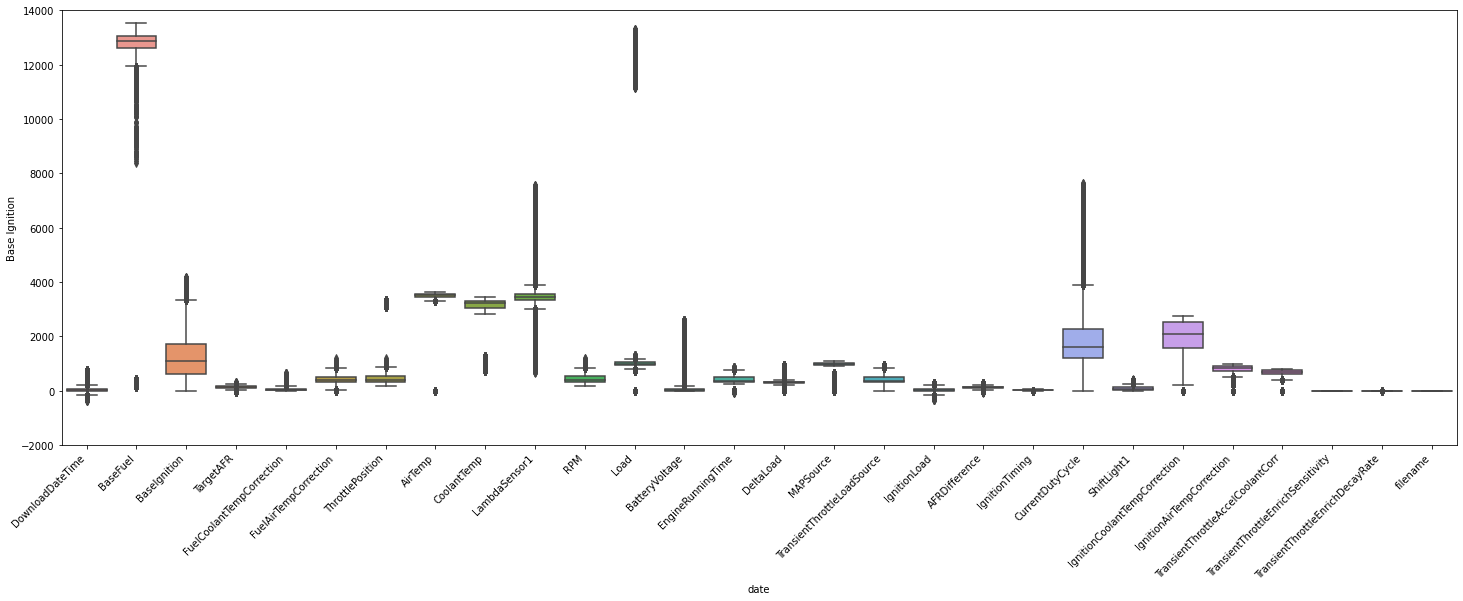

In [14]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (25,8)) 
plt.ylim(-2000,14000)
import seaborn as sns
sns.boxplot(data=frame)
ax.set_xticklabels(labels=frame.columns, rotation=45, ha='right')
ax.set(xlabel='date', ylabel='Base Ignition')

782.0
-366.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


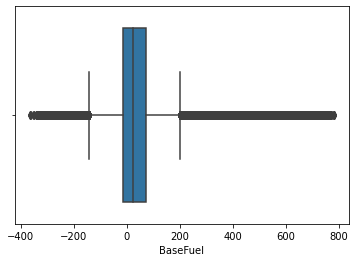

In [15]:
print(frame.BaseFuel.max())
print(frame.BaseFuel.min())
sns.boxplot(frame.BaseFuel)
np.nanpercentile(frame.BaseFuel,[73])
uv = np.nanpercentile(frame.BaseFuel,[73])[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


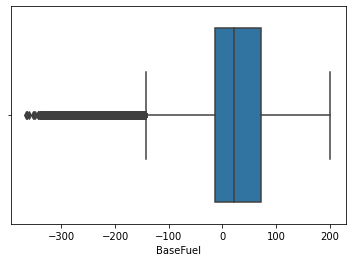

In [16]:
frame.BaseFuel[(frame.BaseFuel>3*uv)] = 3*uv
sns.boxplot(frame.BaseFuel)

In [17]:
print(frame.BaseFuel.min())
print(np.nanpercentile(frame.BaseFuel,[3])[0])
lv =np.nanpercentile(frame.BaseFuel,[3])[0]

-366.0
-118.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


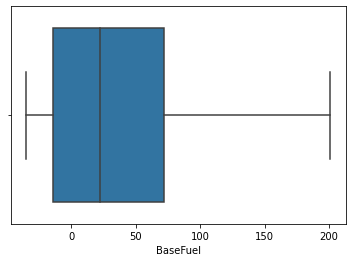

In [18]:
frame.BaseFuel[(frame.BaseFuel < 0.3*lv)] = 0.3*lv
sns.boxplot(frame.BaseFuel)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


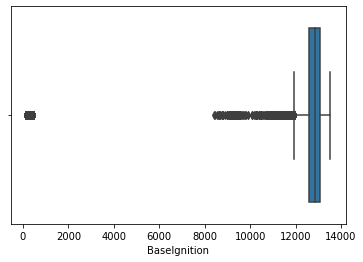

In [19]:
sns.boxplot(frame.BaseIgnition)

130.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


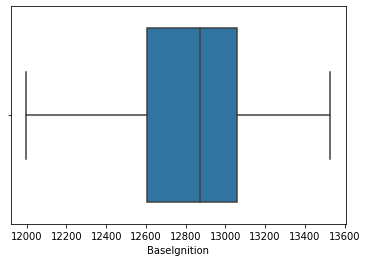

In [20]:
print(frame.BaseIgnition.min())
np.nanpercentile(frame.BaseIgnition,[6.3])[0]
lv_bi = np.nanpercentile(frame.BaseIgnition,[6.3])[0]
frame.BaseIgnition[(frame.BaseIgnition < 1*lv_bi)] = 1*lv_bi
sns.boxplot(frame.BaseIgnition)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


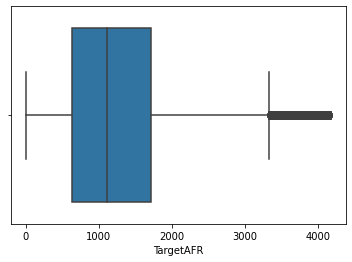

In [21]:
sns.boxplot(frame.TargetAFR)

4169.0
1067.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


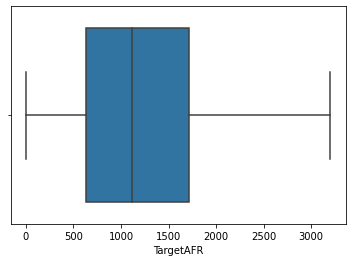

In [22]:
print(frame.TargetAFR.max())
print(np.nanpercentile(frame.TargetAFR,[48])[0])
uv_targetafr = np.nanpercentile(frame.TargetAFR,[48])[0]
frame.TargetAFR[(frame.TargetAFR>3*uv_targetafr)] = 3*uv_targetafr
sns.boxplot(frame.TargetAFR)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


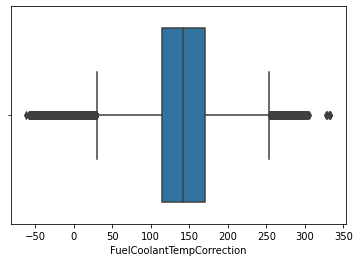

In [23]:
sns.boxplot(frame.FuelCoolantTempCorrection)

83.0
149.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarni

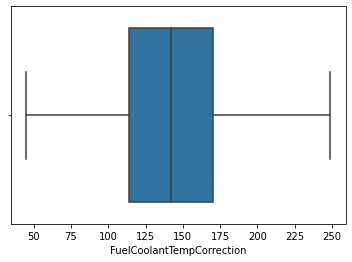

In [24]:
print(np.nanpercentile(frame.FuelCoolantTempCorrection,[11.7])[0])
uv_FuelCoolantTempCorrection = np.nanpercentile(frame.FuelCoolantTempCorrection,[11.7])[0]
frame.FuelCoolantTempCorrection[(frame.FuelCoolantTempCorrection>3*uv_FuelCoolantTempCorrection)] = 3*uv_FuelCoolantTempCorrection

print(np.nanpercentile(frame.FuelCoolantTempCorrection,[57])[0])
lv_FuelCoolantTempCorrection = np.nanpercentile(frame.FuelCoolantTempCorrection,[57])[0]
frame.FuelCoolantTempCorrection[(frame.FuelCoolantTempCorrection<0.3*lv_FuelCoolantTempCorrection)] = 0.3*lv_FuelCoolantTempCorrection
sns.boxplot(frame.FuelCoolantTempCorrection)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


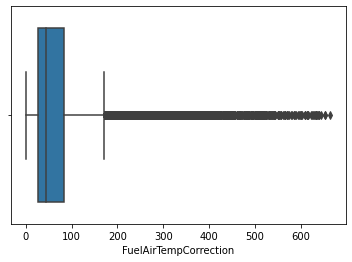

In [25]:
sns.boxplot(frame.FuelAirTempCorrection)

56.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


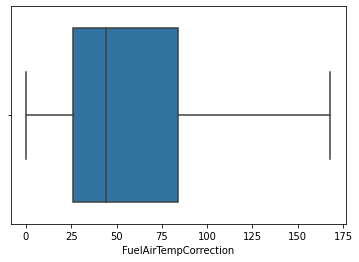

In [26]:

print(np.nanpercentile(frame.FuelAirTempCorrection,[58])[0])
uv_FuelAirTempCorrection = np.nanpercentile(frame.FuelAirTempCorrection,[58])[0]
frame.FuelAirTempCorrection[(frame.FuelAirTempCorrection>3*uv_FuelAirTempCorrection)] = 3*uv_FuelAirTempCorrection
sns.boxplot(frame.FuelAirTempCorrection)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


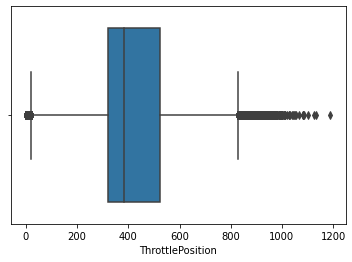

In [27]:
sns.boxplot(frame.ThrottlePosition)

406.0
36.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarni

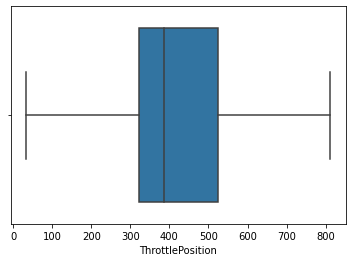

In [28]:
print(np.nanpercentile(frame.ThrottlePosition,[55])[0])
uv_ThrottlePosition = np.nanpercentile(frame.ThrottlePosition,[55])[0]
frame.ThrottlePosition[(frame.ThrottlePosition>2*uv_ThrottlePosition)] = 2*uv_ThrottlePosition

print(np.nanpercentile(frame.ThrottlePosition,[2.5])[0])
lv_ThrottlePosition = np.nanpercentile(frame.ThrottlePosition,[2.5])[0]
frame.ThrottlePosition[(frame.ThrottlePosition<0.9*lv_ThrottlePosition)] = 0.9*lv_ThrottlePosition
sns.boxplot(frame.ThrottlePosition)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


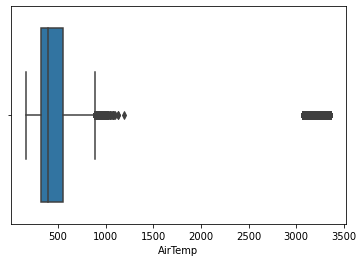

In [29]:
sns.boxplot(frame.AirTemp)

401.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


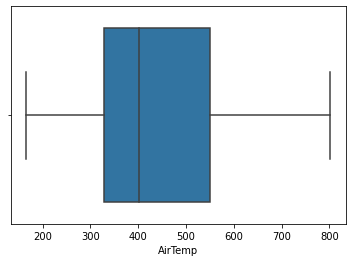

In [30]:
print(np.nanpercentile(frame.AirTemp,[50])[0])
uv_AirTemp = np.nanpercentile(frame.AirTemp,[50])[0]
frame.AirTemp[(frame.AirTemp>2*uv_AirTemp)] = 2*uv_AirTemp
sns.boxplot(frame.AirTemp)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


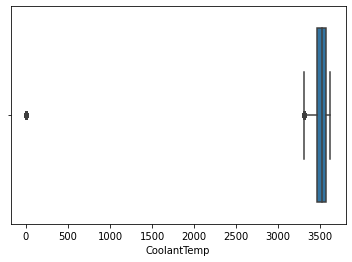

In [31]:
sns.boxplot(frame.CoolantTemp)

3316.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


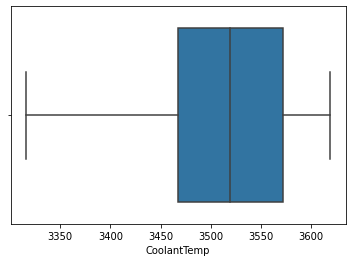

In [32]:
print(np.nanpercentile(frame.CoolantTemp,[1])[0])
lv_CoolantTemp = np.nanpercentile(frame.CoolantTemp,[1])[0]
frame.CoolantTemp[(frame.CoolantTemp<1*lv_CoolantTemp)] = 1*lv_CoolantTemp
sns.boxplot(frame.CoolantTemp)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


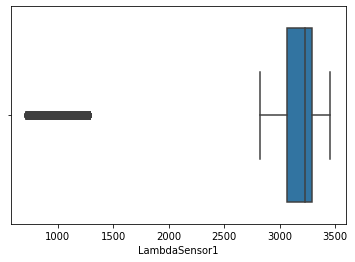

In [33]:
sns.boxplot(frame.LambdaSensor1)

1282.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


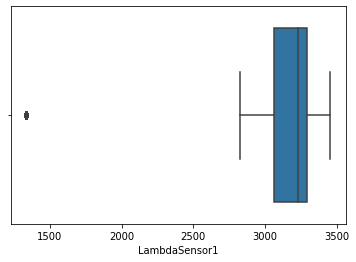

In [34]:
print(np.nanpercentile(frame.LambdaSensor1,[21])[0])
lv_LambdaSensor1 = np.nanpercentile(frame.LambdaSensor1,[21])[0]
frame.LambdaSensor1[(frame.LambdaSensor1<1.04*lv_LambdaSensor1)] = 1.04*lv_LambdaSensor1
sns.boxplot(frame.LambdaSensor1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


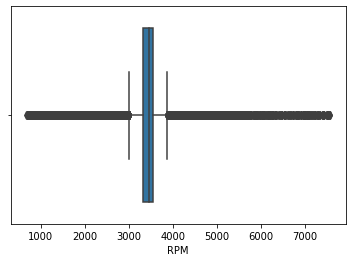

In [35]:
sns.boxplot(frame.RPM)

3617.0
3223.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarni

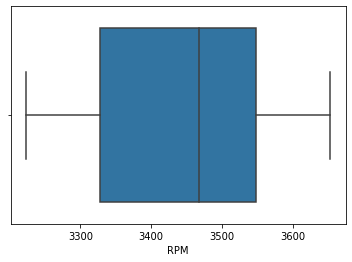

In [36]:
print(np.nanpercentile(frame.RPM,[99])[0])
uv_RPM = np.nanpercentile(frame.RPM,[99])[0]
frame.RPM[(frame.RPM>1.01*uv_RPM)] = 1.01*uv_RPM

print(np.nanpercentile(frame.RPM,[21])[0])
lv_RPM = np.nanpercentile(frame.RPM,[21])[0]
frame.RPM[(frame.RPM<1*lv_RPM)] = 1*lv_RPM
sns.boxplot(frame.RPM)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


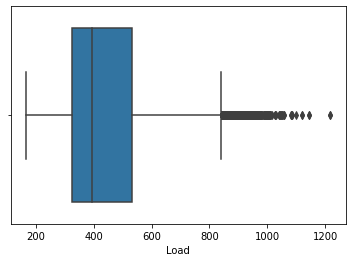

In [37]:
sns.boxplot(frame.Load)

819.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


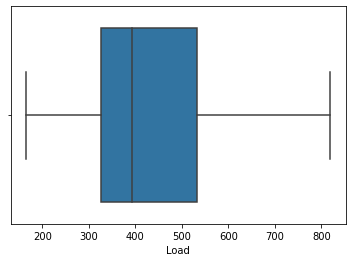

In [38]:
print(np.nanpercentile(frame.Load,[98.5])[0])
uv_Load = np.nanpercentile(frame.Load,[98.5])[0]
frame.Load[(frame.Load>1*uv_Load)] = 1.*uv_Load
sns.boxplot(frame.Load)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


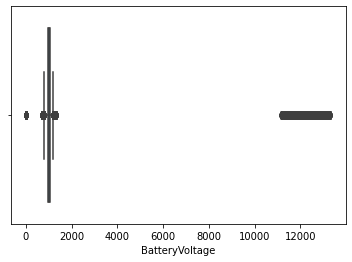

In [39]:
sns.boxplot(frame.BatteryVoltage)

1178.0
826.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarni

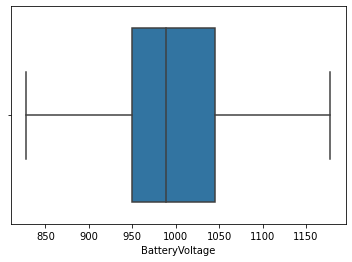

In [40]:
print(np.nanpercentile(frame.BatteryVoltage,[90])[0])
uv_BatteryVoltage = np.nanpercentile(frame.BatteryVoltage,[90])[0]
frame.BatteryVoltage[(frame.BatteryVoltage>1*uv_BatteryVoltage)] = 1*uv_BatteryVoltage

print(np.nanpercentile(frame.BatteryVoltage,[1])[0])
lv_BatteryVoltage = np.nanpercentile(frame.BatteryVoltage,[1])[0]
frame.BatteryVoltage[(frame.BatteryVoltage<1.002*lv_BatteryVoltage)] = 1.002*lv_BatteryVoltage

sns.boxplot(frame.BatteryVoltage)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


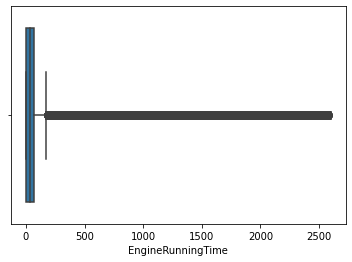

In [41]:
sns.boxplot(frame.EngineRunningTime)


171.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


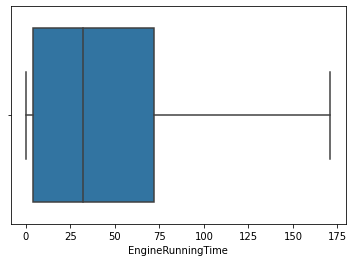

In [42]:
print(np.nanpercentile(frame.EngineRunningTime,[97])[0])
uv_EngineRunningTime = np.nanpercentile(frame.EngineRunningTime,[97])[0]
frame.EngineRunningTime[(frame.EngineRunningTime>1*uv_EngineRunningTime)] = 1*uv_EngineRunningTime
sns.boxplot(frame.EngineRunningTime)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


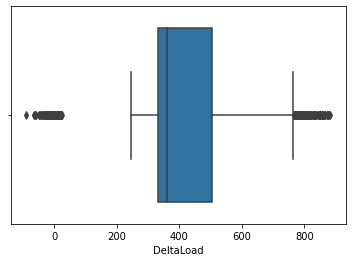

In [43]:
sns.boxplot(frame.DeltaLoad)

632.0
256.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarni

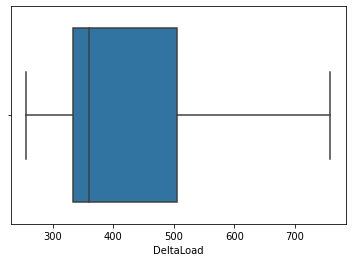

In [44]:
print(np.nanpercentile(frame.DeltaLoad,[99])[0])
uv_DeltaLoad = np.nanpercentile(frame.DeltaLoad,[99])[0]
frame.DeltaLoad[(frame.DeltaLoad>1.2*uv_DeltaLoad)] = 1.2*uv_DeltaLoad

print(np.nanpercentile(frame.DeltaLoad,[6])[0])
lv_DeltaLoad = np.nanpercentile(frame.DeltaLoad,[6])[0]
frame.DeltaLoad[(frame.DeltaLoad<1.002*lv_DeltaLoad)] = 1*lv_DeltaLoad

sns.boxplot(frame.DeltaLoad)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


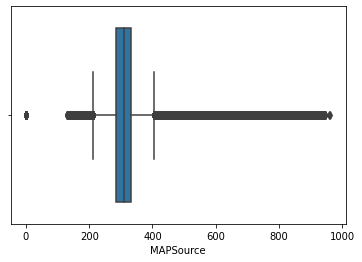

In [45]:
sns.boxplot(frame.MAPSource)

381.0
233.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarni

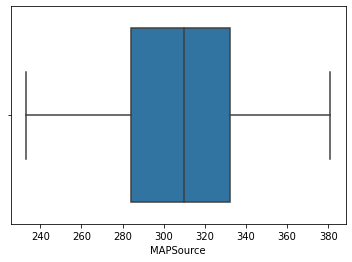

In [46]:
print(np.nanpercentile(frame.MAPSource,[94])[0])
uv_MAPSource = np.nanpercentile(frame.MAPSource,[94])[0]
frame.MAPSource[(frame.MAPSource>1*uv_MAPSource)] = 1*uv_MAPSource

print(np.nanpercentile(frame.MAPSource,[6])[0])
lv_MAPSource = np.nanpercentile(frame.MAPSource,[6])[0]
frame.MAPSource[(frame.MAPSource<1*lv_MAPSource)] = 1*lv_MAPSource

sns.boxplot(frame.MAPSource)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


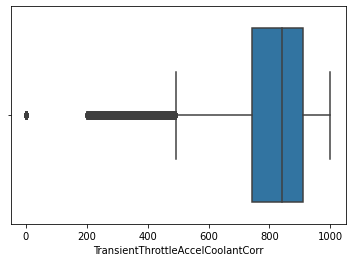

In [47]:
sns.boxplot(frame.TransientThrottleAccelCoolantCorr)

520.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


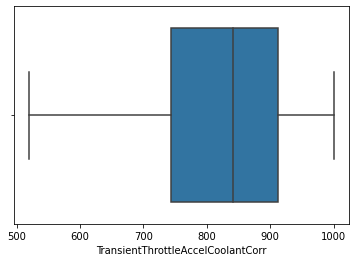

In [48]:
print(np.nanpercentile(frame.TransientThrottleAccelCoolantCorr,[6])[0])
lv_TransientThrottleAccelCoolantCorr = np.nanpercentile(frame.TransientThrottleAccelCoolantCorr,[6])[0]
frame.TransientThrottleAccelCoolantCorr[(frame.TransientThrottleAccelCoolantCorr<1*lv_TransientThrottleAccelCoolantCorr)] = 1*lv_TransientThrottleAccelCoolantCorr

sns.boxplot(frame.TransientThrottleAccelCoolantCorr)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


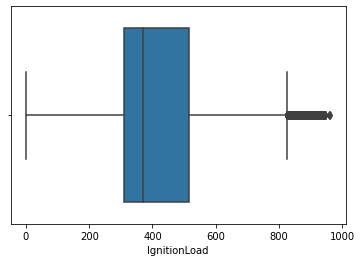

In [49]:
sns.boxplot(frame.IgnitionLoad)

796.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


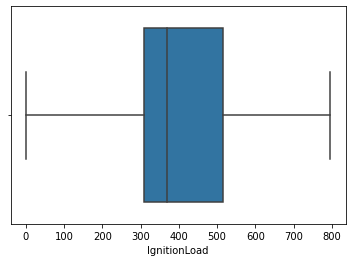

In [50]:
print(np.nanpercentile(frame.IgnitionLoad,[95])[0])
uv_IgnitionLoad = np.nanpercentile(frame.IgnitionLoad,[95])[0]
frame.IgnitionLoad[(frame.IgnitionLoad>1*uv_IgnitionLoad)] = 1*uv_IgnitionLoad
sns.boxplot(frame.IgnitionLoad)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


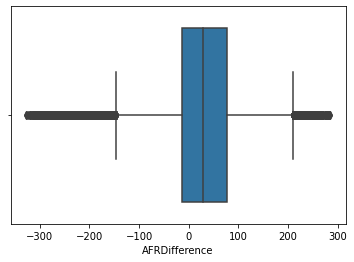

In [51]:
sns.boxplot(frame.AFRDifference)

186.0
-125.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarni

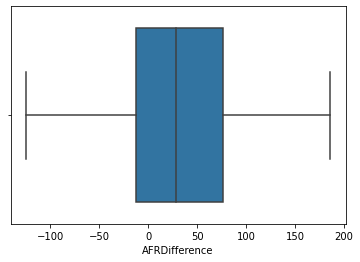

In [52]:
print(np.nanpercentile(frame.AFRDifference,[99])[0])
uv_AFRDifference = np.nanpercentile(frame.AFRDifference,[99])[0]
frame.AFRDifference[(frame.AFRDifference>1*uv_AFRDifference)] = 1*uv_AFRDifference

print(np.nanpercentile(frame.AFRDifference,[4])[0])
lv_AFRDifference = np.nanpercentile(frame.AFRDifference,[4])[0]
frame.AFRDifference[(frame.AFRDifference<1*lv_AFRDifference)] = 1*lv_AFRDifference

sns.boxplot(frame.AFRDifference)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


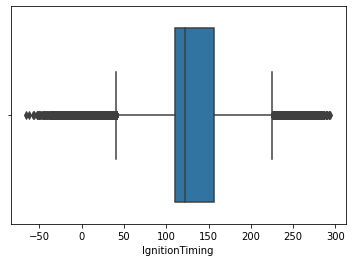

In [53]:
sns.boxplot(frame.IgnitionTiming)

214.0
57.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarni

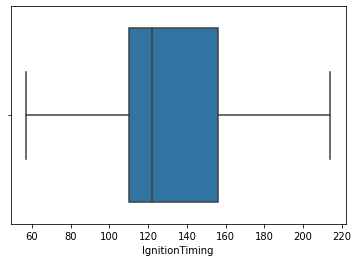

In [54]:
print(np.nanpercentile(frame.IgnitionTiming,[95])[0])
uv_IgnitionTiming = np.nanpercentile(frame.IgnitionTiming,[95])[0]
frame.IgnitionTiming[(frame.IgnitionTiming>1*uv_IgnitionTiming)] = 1*uv_IgnitionTiming

print(np.nanpercentile(frame.IgnitionTiming,[3])[0])
lv_IgnitionTiming = np.nanpercentile(frame.IgnitionTiming,[3])[0]
frame.IgnitionTiming[(frame.IgnitionTiming<1*lv_IgnitionTiming)] = 1*lv_IgnitionTiming

sns.boxplot(frame.IgnitionTiming)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


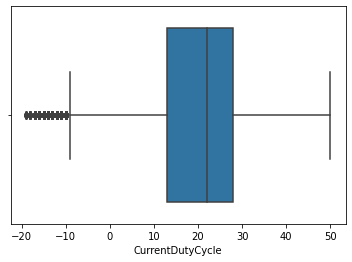

In [55]:
sns.boxplot(frame.CurrentDutyCycle)

-6.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


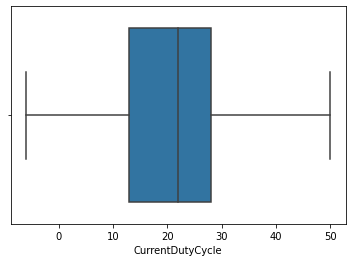

In [56]:
print(np.nanpercentile(frame.CurrentDutyCycle,[2])[0])
lv_CurrentDutyCycle = np.nanpercentile(frame.CurrentDutyCycle,[2])[0]
frame.CurrentDutyCycle[(frame.CurrentDutyCycle<1*lv_CurrentDutyCycle)] = 1*lv_CurrentDutyCycle

sns.boxplot(frame.CurrentDutyCycle)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


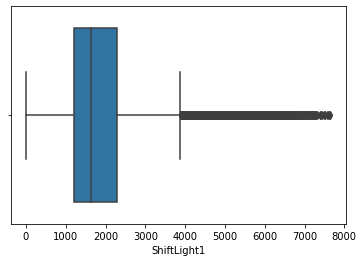

In [57]:
sns.boxplot(frame.ShiftLight1)

3477.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


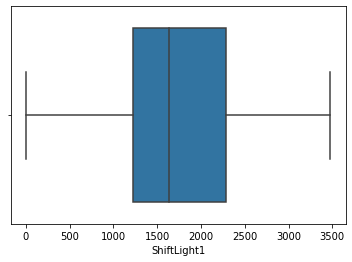

In [58]:
print(np.nanpercentile(frame.ShiftLight1,[99])[0])
uv_ShiftLight1 = np.nanpercentile(frame.ShiftLight1,[99])[0]
frame.ShiftLight1[(frame.ShiftLight1>1*uv_ShiftLight1)] = 1*uv_ShiftLight1
sns.boxplot(frame.ShiftLight1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


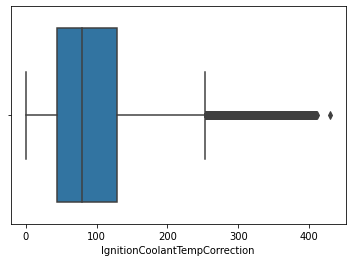

In [59]:
sns.boxplot(frame.IgnitionCoolantTempCorrection)

253.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


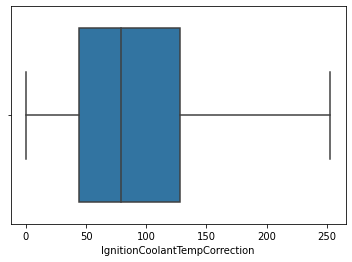

In [60]:
print(np.nanpercentile(frame.IgnitionCoolantTempCorrection,[95])[0])
uv_IgnitionCoolantTempCorrection = np.nanpercentile(frame.IgnitionCoolantTempCorrection,[95])[0]
frame.IgnitionCoolantTempCorrection[(frame.IgnitionCoolantTempCorrection>1*uv_IgnitionCoolantTempCorrection)] = 1*uv_IgnitionCoolantTempCorrection
sns.boxplot(frame.IgnitionCoolantTempCorrection)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


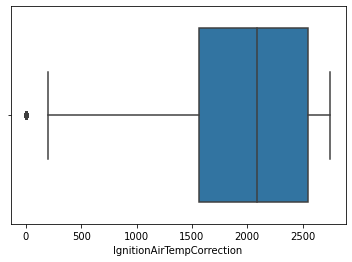

In [61]:
sns.boxplot(frame.IgnitionAirTempCorrection)

860.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


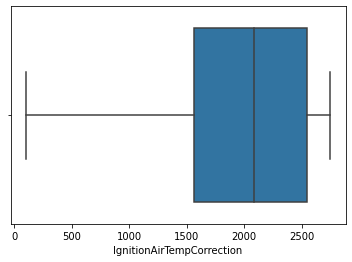

In [62]:
print(np.nanpercentile(frame.IgnitionAirTempCorrection,[1])[0])
lv_IgnitionAirTempCorrection = np.nanpercentile(frame.IgnitionAirTempCorrection,[1])[0]
frame.IgnitionAirTempCorrection[(frame.IgnitionAirTempCorrection<0.12*lv_IgnitionAirTempCorrection)] = 0.12*lv_IgnitionAirTempCorrection

sns.boxplot(frame.IgnitionAirTempCorrection)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


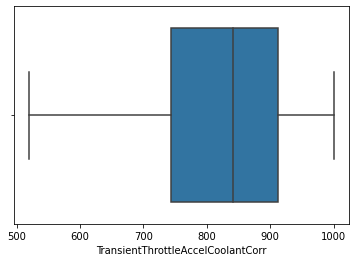

In [63]:
sns.boxplot(frame.TransientThrottleAccelCoolantCorr)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


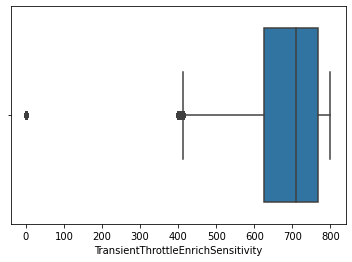

In [64]:
sns.boxplot(frame.TransientThrottleEnrichSensitivity)

473.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


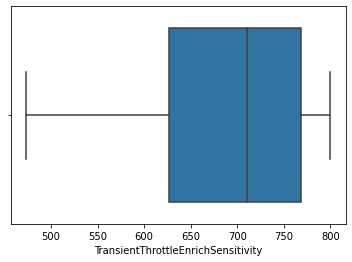

In [65]:
print(np.nanpercentile(frame.TransientThrottleEnrichSensitivity,[1])[0])
lv_TransientThrottleEnrichSensitivity = np.nanpercentile(frame.TransientThrottleEnrichSensitivity,[1])[0]
frame.TransientThrottleEnrichSensitivity[(frame.TransientThrottleEnrichSensitivity<1*lv_TransientThrottleEnrichSensitivity)] = 1*lv_TransientThrottleEnrichSensitivity
sns.boxplot(frame.TransientThrottleEnrichSensitivity)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


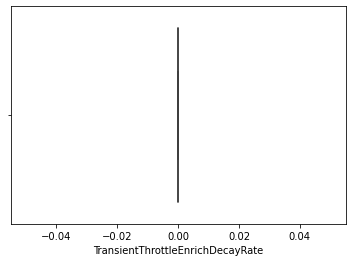

In [66]:
sns.boxplot(frame.TransientThrottleEnrichDecayRate)

[Text(0, 0.5, 'Unit'), Text(0.5, 0, 'Features')]

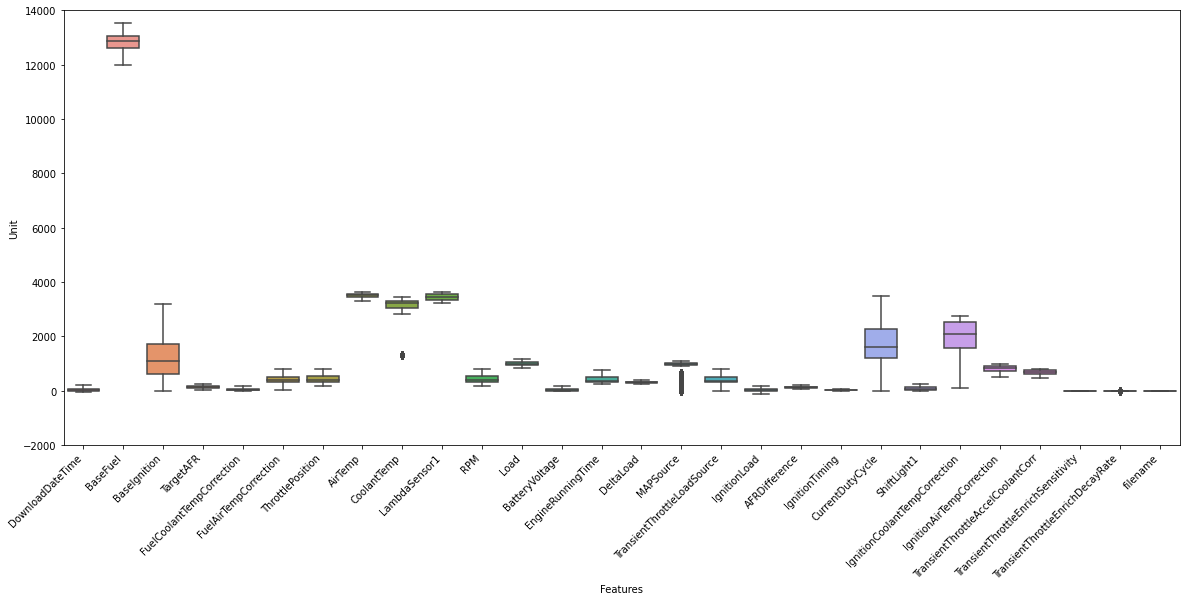

In [67]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (20,8)) 
plt.ylim(-2000,14000)
import seaborn as sns
sns.boxplot(data=frame)
ax.set_xticklabels(labels=frame.columns, rotation=45, ha='right')
ax.set(xlabel='Features', ylabel='Unit')

In [68]:
frame.corr()

,BaseFuel,BaseIgnition,TargetAFR,FuelCoolantTempCorrection,FuelAirTempCorrection,ThrottlePosition,AirTemp,CoolantTemp,LambdaSensor1,RPM,Load,BatteryVoltage,EngineRunningTime,DeltaLoad,MAPSource,TransientThrottleLoadSource,IgnitionLoad,AFRDifference,IgnitionTiming,CurrentDutyCycle,ShiftLight1,IgnitionCoolantTempCorrection,IgnitionAirTempCorrection,TransientThrottleAccelCoolantCorr,TransientThrottleEnrichSensitivity,TransientThrottleEnrichDecayRate,TransientThrottlePercentageAsync,TransientThrottlePercentageEnrich
BaseFuel,1.000000,-0.085861,-0.257900,0.383900,-0.348372,-0.575339,-0.198321,0.236481,-0.812561,-0.707284,-0.349439,-0.184169,-0.253539,-0.524746,0.402095,-0.713333,0.111030,0.018020,0.499639,0.276284,-0.083996,0.263800,0.206542,-0.266323,0.083723,NaN,0.351036,-0.034319
BaseIgnition,-0.085861,1.000000,-0.253558,0.240561,-0.086531,0.079639,-0.278261,-0.262734,0.696577,0.333902,-0.147912,-0.516560,-0.155606,0.030087,-0.118466,0.780990,-0.124604,-0.014093,-0.384690,0.424392,-0.013940,0.456965,0.069916,-0.460849,0.047838,NaN,-0.584650,-0.293343
TargetAFR,-0.257900,-0.253558,1.000000,-0.086240,0.013018,-0.057246,-0.087167,-0.243598,0.193635,0.470918,-0.094899,0.209153,0.013371,-0.001550,0.091480,0.110927,-0.402333,0.025581,-0.061789,-0.473142,0.095480,-0.588987,-0.085642,0.594406,-0.073794,NaN,-0.031709,0.214021
FuelCoolantTempCorrection,0.383900,0.240561,-0.086240,1.000000,-0.376821,-0.682041,-0.681889,-0.296034,-0.223109,-0.209097,-0.682902,-0.225375,-0.415608,-0.537007,0.882365,0.719449,-0.430796,-0.318074,0.629292,0.448393,0.140054,0.033433,0.119973,-0.034059,-0.133001,NaN,0.396935,-0.178411
FuelAirTempCorrection,-0.348372,-0.086531,0.013018,-0.376821,1.000000,0.818638,0.817790,-0.151451,0.012180,-0.095859,0.818695,0.256639,0.968972,0.879017,-0.395311,-0.466639,-0.792202,-0.584914,-0.192506,-0.047317,0.787319,-0.128042,-0.902532,0.124893,-0.776987,NaN,0.601350,0.103218
ThrottlePosition,-0.575339,0.079639,-0.057246,-0.682041,0.818638,1.000000,0.803165,-0.224240,0.649953,0.379646,0.859197,-0.027995,0.761088,0.939164,-0.730680,0.676674,0.668495,-0.232989,-0.496326,-0.073342,0.370592,0.055047,-0.607296,-0.055502,-0.389767,NaN,0.311718,0.075722
AirTemp,-0.198321,-0.278261,-0.087167,-0.681889,0.817790,0.803165,1.000000,0.321671,-0.584046,-0.449237,0.901126,0.417133,0.849362,0.792983,-0.579402,-0.451700,0.175934,0.023852,0.250972,-0.072584,0.370270,0.055698,-0.606952,-0.056148,-0.389589,NaN,0.321454,0.077152
CoolantTemp,0.236481,-0.262734,-0.243598,-0.296034,-0.151451,-0.224240,0.321671,1.000000,-0.211728,-0.110475,-0.115749,0.232859,0.589993,-0.248397,-0.106860,-0.306692,-0.081271,-0.073284,-0.248110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LambdaSensor1,-0.812561,0.696577,0.193635,-0.223109,0.012180,0.649953,-0.584046,-0.211728,1.000000,0.861724,0.040344,-0.751285,-0.437760,0.512507,-0.387773,0.991538,-0.102720,-0.014610,-0.424521,-0.647554,0.071606,-0.859992,-0.064154,0.862682,-0.072678,NaN,0.112326,0.309875
RPM,-0.707284,0.333902,0.470918,-0.209097,-0.095859,0.379646,-0.449237,-0.110475,0.861724,1.000000,-0.006675,-0.494243,-0.283067,0.301990,-0.275824,0.836300,0.224166,-0.020417,-0.433931,-0.489631,-0.072223,-0.991121,0.088349,0.989576,0.090913,NaN,0.058579,0.293125


In [69]:
corr = frame.corr()

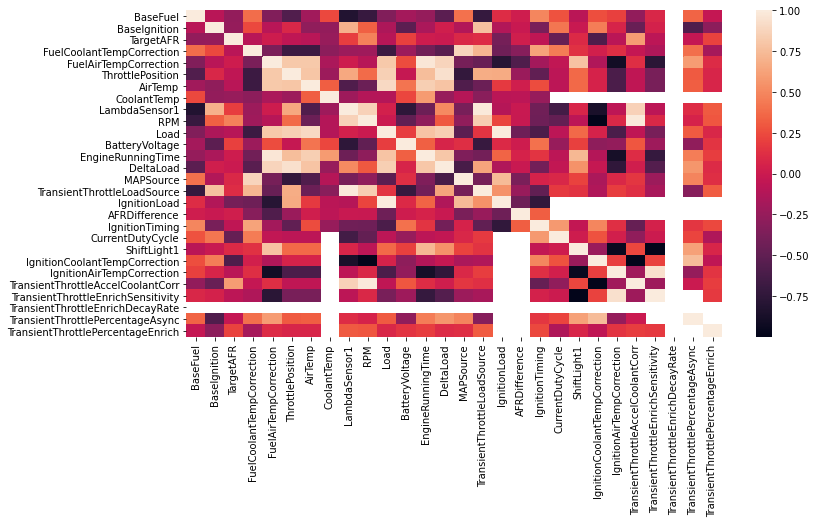

In [70]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(corr)

In [71]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414545 entries, 0 to 1414544
Data columns (total 30 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   DownloadDateTime                    1414545 non-null  object 
 1   BaseFuel                            1330367 non-null  float64
 2   BaseIgnition                        1260335 non-null  float64
 3   TargetAFR                           216904 non-null   float64
 4   FuelCoolantTempCorrection           843773 non-null   float64
 5   FuelAirTempCorrection               803514 non-null   float64
 6   ThrottlePosition                    1233952 non-null  float64
 7   AirTemp                             1214073 non-null  float64
 8   CoolantTemp                         39889 non-null    float64
 9   LambdaSensor1                       563660 non-null   float64
 10  RPM                                 581487 non-null   float64
 11  Load       

In [72]:
del frame['TransientThrottleEnrichDecayRate']

In [73]:
del frame['TransientThrottlePercentageEnrich']
del frame['TransientThrottlePercentageAsync']

In [74]:
frame.isnull().sum()

DownloadDateTime                            0
BaseFuel                                84178
BaseIgnition                           154210
TargetAFR                             1197641
FuelCoolantTempCorrection              570772
FuelAirTempCorrection                  611031
ThrottlePosition                       180593
AirTemp                                200472
CoolantTemp                           1374656
LambdaSensor1                          850885
RPM                                    833058
Load                                   135413
BatteryVoltage                          72450
EngineRunningTime                      730973
DeltaLoad                              238410
MAPSource                              509591
TransientThrottleLoadSource           1102672
IgnitionLoad                          1308249
AFRDifference                         1295773
IgnitionTiming                        1233913
CurrentDutyCycle                      1229412
ShiftLight1                       

In [75]:
frame.info()
#frame = frame.apply(lambda x: x.fillna(x.mean()),axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414545 entries, 0 to 1414544
Data columns (total 27 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   DownloadDateTime                    1414545 non-null  object 
 1   BaseFuel                            1330367 non-null  float64
 2   BaseIgnition                        1260335 non-null  float64
 3   TargetAFR                           216904 non-null   float64
 4   FuelCoolantTempCorrection           843773 non-null   float64
 5   FuelAirTempCorrection               803514 non-null   float64
 6   ThrottlePosition                    1233952 non-null  float64
 7   AirTemp                             1214073 non-null  float64
 8   CoolantTemp                         39889 non-null    float64
 9   LambdaSensor1                       563660 non-null   float64
 10  RPM                                 581487 non-null   float64
 11  Load       

In [76]:
file_date = frame['filename'].str.slice(0,8)

In [77]:
file_date

0          20180718
1          20180718
2          20180718
3          20180718
4          20180718
             ...   
1414540    20180816
1414541    20180816
1414542    20180816
1414543    20180816
1414544    20180816
Name: filename, Length: 1414545, dtype: object

In [78]:
frame['filename'] = frame['filename'].str.slice(0,8)

In [79]:
frame.head()

,DownloadDateTime,BaseFuel,BaseIgnition,TargetAFR,FuelCoolantTempCorrection,FuelAirTempCorrection,ThrottlePosition,AirTemp,CoolantTemp,LambdaSensor1,RPM,Load,BatteryVoltage,EngineRunningTime,DeltaLoad,MAPSource,TransientThrottleLoadSource,IgnitionLoad,AFRDifference,IgnitionTiming,CurrentDutyCycle,ShiftLight1,IgnitionCoolantTempCorrection,IgnitionAirTempCorrection,TransientThrottleAccelCoolantCorr,TransientThrottleEnrichSensitivity,filename
0,07:27:14.000,68.0,13153.0,89.0,249.0,23.0,412.0,412.0,3316.0,3031.0,3229.0,412.0,827.652,0.0,335.0,233.0,1000.0,0.0,0.0,57.0,0.0,1022.0,0.0,103.2,520.0,473.0,20180718
1,07:27:14.078,64.0,13216.0,NaN,NaN,NaN,409.0,409.0,NaN,3030.0,NaN,410.0,NaN,NaN,337.0,NaN,NaN,NaN,NaN,NaN,NaN,1032.0,NaN,NaN,NaN,NaN,20180718
2,07:27:14.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.0,NaN,NaN,NaN,181.0,50.0,NaN,253.0,2725.0,520.0,796.0,20180718
3,07:27:14.125,64.0,13216.0,NaN,NaN,NaN,411.0,411.0,NaN,NaN,3229.0,409.0,936.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1034.0,NaN,NaN,NaN,NaN,20180718
4,07:27:14.188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3030.0,3230.0,NaN,NaN,NaN,337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2728.0,NaN,796.0,20180718


In [80]:
frame['filename'] = pd.to_datetime(frame['filename'], format='%Y%m%d')

In [81]:
frame.head()

,DownloadDateTime,BaseFuel,BaseIgnition,TargetAFR,FuelCoolantTempCorrection,FuelAirTempCorrection,ThrottlePosition,AirTemp,CoolantTemp,LambdaSensor1,RPM,Load,BatteryVoltage,EngineRunningTime,DeltaLoad,MAPSource,TransientThrottleLoadSource,IgnitionLoad,AFRDifference,IgnitionTiming,CurrentDutyCycle,ShiftLight1,IgnitionCoolantTempCorrection,IgnitionAirTempCorrection,TransientThrottleAccelCoolantCorr,TransientThrottleEnrichSensitivity,filename
0,07:27:14.000,68.0,13153.0,89.0,249.0,23.0,412.0,412.0,3316.0,3031.0,3229.0,412.0,827.652,0.0,335.0,233.0,1000.0,0.0,0.0,57.0,0.0,1022.0,0.0,103.2,520.0,473.0,2018-07-18
1,07:27:14.078,64.0,13216.0,NaN,NaN,NaN,409.0,409.0,NaN,3030.0,NaN,410.0,NaN,NaN,337.0,NaN,NaN,NaN,NaN,NaN,NaN,1032.0,NaN,NaN,NaN,NaN,2018-07-18
2,07:27:14.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.0,NaN,NaN,NaN,181.0,50.0,NaN,253.0,2725.0,520.0,796.0,2018-07-18
3,07:27:14.125,64.0,13216.0,NaN,NaN,NaN,411.0,411.0,NaN,NaN,3229.0,409.0,936.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1034.0,NaN,NaN,NaN,NaN,2018-07-18
4,07:27:14.188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3030.0,3230.0,NaN,NaN,NaN,337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2728.0,NaN,796.0,2018-07-18


In [ ]:
column_means = frame.mean()

In [145]:
column_means

BaseFuel                                 41.002821
BaseIgnition                          12801.802072
TargetAFR                              1217.638139
FuelCoolantTempCorrection               140.526026
FuelAirTempCorrection                    59.485063
ThrottlePosition                        417.887588
AirTemp                                 447.926668
CoolantTemp                            3513.193587
LambdaSensor1                          2841.253829
RPM                                    3435.412298
Load                                    435.118930
BatteryVoltage                         1003.145171
EngineRunningTime                        44.277446
DeltaLoad                               408.121320
MAPSource                               307.981676
TransientThrottleLoadSource             830.809047
IgnitionLoad                            421.798120
AFRDifference                            26.986091
IgnitionTiming                          134.174631
CurrentDutyCycle               

In [146]:
frame = frame.fillna(column_means)

In [147]:
frame.isnull().sum()

DownloadDateTime                      0
BaseFuel                              0
BaseIgnition                          0
TargetAFR                             0
FuelCoolantTempCorrection             0
FuelAirTempCorrection                 0
ThrottlePosition                      0
AirTemp                               0
CoolantTemp                           0
LambdaSensor1                         0
RPM                                   0
Load                                  0
BatteryVoltage                        0
EngineRunningTime                     0
DeltaLoad                             0
MAPSource                             0
TransientThrottleLoadSource           0
IgnitionLoad                          0
AFRDifference                         0
IgnitionTiming                        0
CurrentDutyCycle                      0
ShiftLight1                           0
IgnitionCoolantTempCorrection         0
IgnitionAirTempCorrection             0
TransientThrottleAccelCoolantCorr     0


In [148]:
frame.describe()

,BaseFuel,BaseIgnition,TargetAFR,FuelCoolantTempCorrection,FuelAirTempCorrection,ThrottlePosition,AirTemp,CoolantTemp,LambdaSensor1,RPM,Load,BatteryVoltage,EngineRunningTime,DeltaLoad,MAPSource,TransientThrottleLoadSource,IgnitionLoad,AFRDifference,IgnitionTiming,CurrentDutyCycle,ShiftLight1,IgnitionCoolantTempCorrection,IgnitionAirTempCorrection,TransientThrottleAccelCoolantCorr,TransientThrottleEnrichSensitivity
count,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06,1.414545e+06
mean,4.100282e+01,1.280180e+04,1.217638e+03,1.405260e+02,5.948506e+01,4.178876e+02,4.479267e+02,3.513194e+03,2.841254e+03,3.435412e+03,4.351189e+02,1.003145e+03,4.427745e+01,4.081213e+02,3.079817e+02,8.308090e+02,4.217981e+02,2.698609e+01,1.341746e+02,2.100669e+01,1.795561e+03,9.341585e+01,2.027722e+03,8.145875e+02,6.907447e+02
std,6.899447e+01,3.192577e+02,2.889232e+02,3.502493e+01,3.031156e+01,1.517661e+02,1.445165e+02,1.109295e+01,4.940003e+02,8.597339e+01,1.389434e+02,8.094317e+01,3.123487e+01,9.540829e+01,3.090886e+01,1.795689e+02,4.359818e+01,1.925053e+01,1.326101e+01,4.375000e+00,6.304240e+02,3.006191e+01,5.113250e+02,5.861012e+01,7.927777e+01
min,-3.540000e+01,1.199600e+04,0.000000e+00,4.470000e+01,0.000000e+00,3.240000e+01,1.650000e+02,3.316000e+03,1.333280e+03,3.223000e+03,1.650000e+02,8.276520e+02,0.000000e+00,2.560000e+02,2.330000e+02,0.000000e+00,0.000000e+00,-1.250000e+02,5.700000e+01,-6.000000e+00,0.000000e+00,0.000000e+00,1.032000e+02,5.200000e+02,4.730000e+02
25%,-1.100000e+01,1.265200e+04,1.217638e+03,1.340000e+02,3.600000e+01,3.270000e+02,3.350000e+02,3.513194e+03,2.841254e+03,3.435412e+03,3.290000e+02,9.520000e+02,3.600000e+01,3.360000e+02,3.010000e+02,8.308090e+02,4.217981e+02,2.698609e+01,1.341746e+02,2.100669e+01,1.242000e+03,9.341585e+01,1.645000e+03,8.145875e+02,6.450000e+02
50%,2.700000e+01,1.282500e+04,1.217638e+03,1.405260e+02,5.948506e+01,4.178876e+02,4.479267e+02,3.513194e+03,2.841254e+03,3.435412e+03,4.190000e+02,9.940000e+02,4.427745e+01,4.081213e+02,3.079817e+02,8.308090e+02,4.217981e+02,2.698609e+01,1.341746e+02,2.100669e+01,1.795561e+03,9.341585e+01,2.027722e+03,8.145875e+02,6.907447e+02
75%,6.800000e+01,1.304300e+04,1.217638e+03,1.500000e+02,5.948506e+01,4.980000e+02,5.210000e+02,3.513194e+03,3.167000e+03,3.435412e+03,5.130000e+02,1.039000e+03,4.427745e+01,4.820000e+02,3.200000e+02,8.308090e+02,4.217981e+02,2.698609e+01,1.341746e+02,2.100669e+01,2.200000e+03,9.341585e+01,2.521000e+03,8.145875e+02,7.630000e+02
max,2.010000e+02,1.352800e+04,3.201000e+03,2.490000e+02,1.680000e+02,8.120000e+02,8.020000e+02,3.619000e+03,3.455000e+03,3.653170e+03,8.190000e+02,1.178000e+03,1.710000e+02,7.584000e+02,3.810000e+02,1.088000e+03,7.960000e+02,1.860000e+02,2.140000e+02,5.000000e+01,3.477000e+03,2.530000e+02,2.750000e+03,1.000000e+03,8.000000e+02


In [149]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414545 entries, 0 to 1414544
Data columns (total 27 columns):
 #   Column                              Non-Null Count    Dtype         
---  ------                              --------------    -----         
 0   DownloadDateTime                    1414545 non-null  object        
 1   BaseFuel                            1414545 non-null  float64       
 2   BaseIgnition                        1414545 non-null  float64       
 3   TargetAFR                           1414545 non-null  float64       
 4   FuelCoolantTempCorrection           1414545 non-null  float64       
 5   FuelAirTempCorrection               1414545 non-null  float64       
 6   ThrottlePosition                    1414545 non-null  float64       
 7   AirTemp                             1414545 non-null  float64       
 8   CoolantTemp                         1414545 non-null  float64       
 9   LambdaSensor1                       1414545 non-null  float64       

In [96]:
frame.head()

,DownloadDateTime,BaseFuel,BaseIgnition,TargetAFR,FuelCoolantTempCorrection,FuelAirTempCorrection,ThrottlePosition,AirTemp,CoolantTemp,LambdaSensor1,RPM,Load,BatteryVoltage,EngineRunningTime,DeltaLoad,MAPSource,TransientThrottleLoadSource,IgnitionLoad,AFRDifference,IgnitionTiming,CurrentDutyCycle,ShiftLight1,IgnitionCoolantTempCorrection,IgnitionAirTempCorrection,TransientThrottleAccelCoolantCorr,TransientThrottleEnrichSensitivity,filename
0,07:27:14.000,68.000000,1680.000000,22.800000,4.200000,6.300000,2.100000,63.9,0.000000,260.1,332.1,63.6,0.000000,0.0,-0.300000,0.000000,1.200000,0.000000,-84.000000,0.000000,-2.400000,274.200000,0.000000,0.000000,0.000000,0.000000,2018-07-18
1,07:27:14.078,64.000000,1680.000000,22.784985,4.119612,6.291049,2.100000,63.9,988.641295,260.1,332.1,63.6,247.791691,0.0,-0.300000,58.797336,1.199982,61.117092,-90.213055,5.592642,-2.565979,274.200000,0.596753,257.986631,101.983928,141.894446,2018-07-18
2,07:27:14.110,55.800291,1600.974182,22.784985,4.119612,6.291049,2.099937,63.9,988.641295,260.1,332.1,63.6,247.791691,0.0,-0.316058,58.800000,1.199982,61.117092,-90.213055,5.700000,-2.400000,274.191694,0.600000,258.000000,102.000000,141.900000,2018-07-18
3,07:27:14.125,64.000000,1680.000000,22.784985,4.119612,6.291049,2.100000,63.9,988.641295,260.1,332.1,63.6,247.800000,0.0,-0.316058,58.797336,1.199982,61.117092,-90.213055,5.592642,-2.565979,274.200000,0.596753,257.986631,101.983928,141.894446,2018-07-18
4,07:27:14.188,55.800291,1600.974182,22.784985,4.119612,6.291049,2.099937,63.9,988.641295,260.1,332.1,63.6,247.791691,0.0,-0.300000,58.797336,1.199982,61.117092,-90.213055,5.592642,-2.565979,274.191694,0.596753,258.000000,101.983928,141.900000,2018-07-18


In [150]:
import seaborn as sns
from matplotlib import pyplot as plt

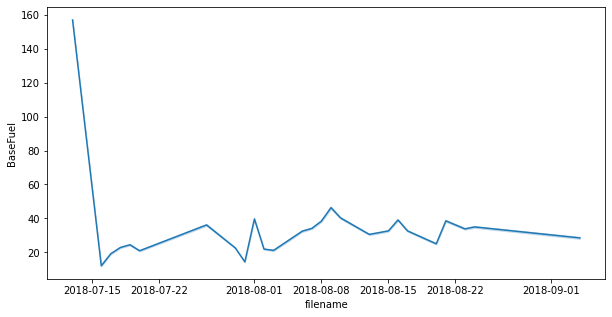

In [151]:
plt.figure(figsize=(10,5))
#plt.ylim(-10,100)
#plt.xlim(2018,2019)
#x_dates = frame['filename'].dt.strftime('%Y-%m-%d').sort_values().unique()
sns.lineplot(x='filename',y='BaseFuel',data=frame)

[Text(0, 0.5, 'Base Ignition'), Text(0.5, 0, 'date')]

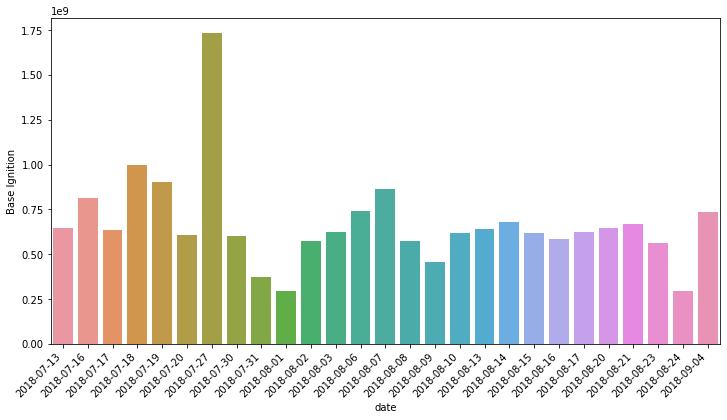

In [152]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = "filename", y = "BaseIgnition", data = frame, 
                  estimator = sum, ci = None, ax=ax)

x_dates = frame['filename'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.set(xlabel='date', ylabel='Base Ignition')

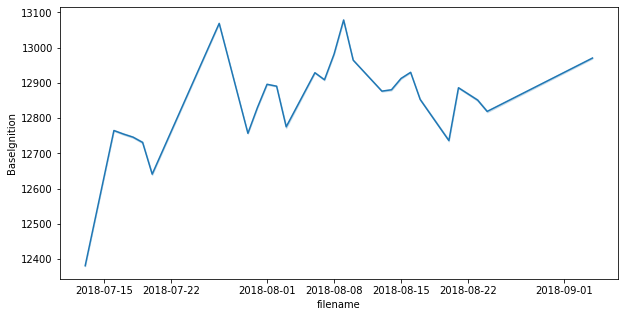

In [153]:
plt.figure(figsize=(10,5))
sns.lineplot(x='filename',y='BaseIgnition',data=frame)

[Text(0, 0.5, 'Base Fuel'), Text(0.5, 0, 'date')]

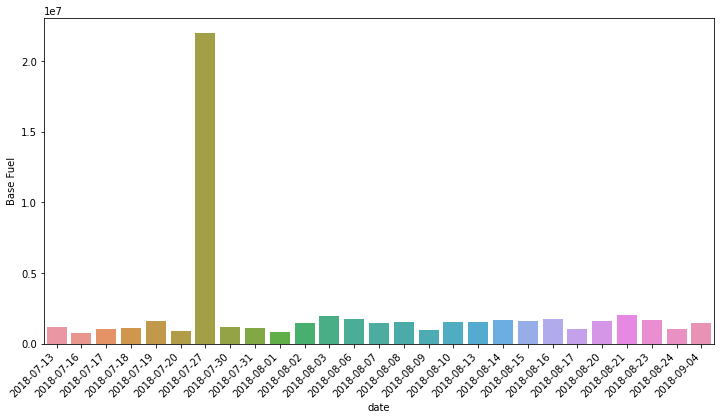

In [154]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = "filename", y = "BaseFuel", data = frame, 
                  estimator = sum, ci = None, ax=ax)

x_dates = frame['filename'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.set(xlabel='date', ylabel='Base Fuel')